# 1. Importar Librerias

In [42]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.utils.multiclass import type_of_target
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier #ya que hay un desbalanceo de clases
from sklearn.metrics import make_scorer, accuracy_score, f1_score, confusion_matrix, cohen_kappa_score,recall_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
import matplotlib.pyplot as plt
import seaborn as sns
from  sklearn.model_selection import GridSearchCV, KFold

# 2. Obtener lso datos y analizarlos

In [43]:
datos= pd.read_csv('https://raw.githubusercontent.com/profcarlosamartinez/mineria_datos/main/ausentismo_2023/datos_train.csv',delimiter=',',decimal='.')

In [44]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86000 entries, 0 to 85999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 86000 non-null  int64 
 1   id_paciente        86000 non-null  int64 
 2   id_turno           86000 non-null  int64 
 3   sexo               86000 non-null  object
 4   dia_reserva_turno  86000 non-null  object
 5   dia_turno          86000 non-null  object
 6   cod_barrio         86000 non-null  int64 
 7   edad               86000 non-null  int64 
 8   plan_social        86000 non-null  int64 
 9   hipertension       86000 non-null  int64 
 10  diabetes           86000 non-null  int64 
 11  alcoholismo        86000 non-null  int64 
 12  discapacidades     86000 non-null  int64 
 13  sms_recibidos      86000 non-null  int64 
 14  ausente            86000 non-null  int64 
dtypes: int64(12), object(3)
memory usage: 9.8+ MB


In [45]:
datos.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

<ipython-input-45-bc3bfbcaec5f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  datos.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
<ipython-input-45-bc3bfbcaec5f>:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  datos.corr().style.background_gradient(cmap='coolwarm').set_precision(2)


,id,id_paciente,id_turno,cod_barrio,edad,plan_social,hipertension,diabetes,alcoholismo,discapacidades,sms_recibidos,ausente
id,1.00,-0.00,0.10,-0.06,0.02,0.00,0.01,0.02,-0.05,0.00,-0.04,-0.01
id_paciente,-0.00,1.00,0.00,0.00,0.00,-0.00,0.01,0.00,0.01,-0.01,-0.01,-0.00
id_turno,0.10,0.00,1.00,0.00,0.01,0.01,0.02,0.03,0.03,0.02,-0.32,-0.19
cod_barrio,-0.06,0.00,0.00,1.00,-0.01,0.01,0.01,0.01,-0.00,0.01,0.02,-0.01
edad,0.02,0.00,0.01,-0.01,1.00,-0.09,0.51,0.29,0.10,0.08,0.01,-0.06
plan_social,0.00,-0.00,0.01,0.01,-0.09,1.00,-0.02,-0.02,0.03,-0.01,0.00,0.03
hipertension,0.01,0.01,0.02,0.01,0.51,-0.02,1.00,0.43,0.09,0.08,-0.00,-0.04
diabetes,0.02,0.00,0.03,0.01,0.29,-0.02,0.43,1.00,0.02,0.06,-0.01,-0.01
alcoholismo,-0.05,0.01,0.03,-0.00,0.10,0.03,0.09,0.02,1.00,0.00,-0.02,-0.00
discapacidades,0.00,-0.01,0.02,0.01,0.08,-0.01,0.08,0.06,0.00,1.00,-0.02,-0.00


<Axes: >

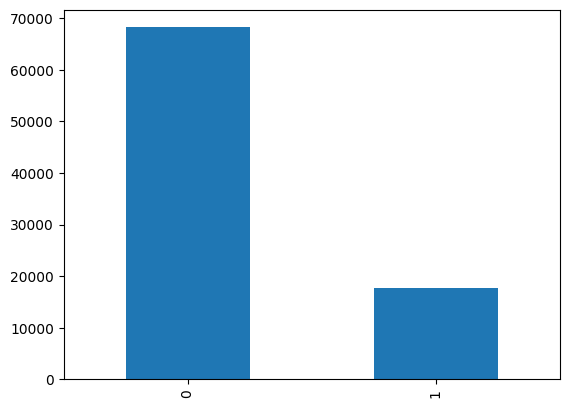

In [46]:
datos.ausente.value_counts() #para ver si hay desbalanceo de clases
# se observa un desbalanceo. Por cada ausente tenemos ~4 presentes
datos.ausente.value_counts().plot(kind='bar') #grafico del desbalanceo

<ipython-input-47-0bb90f9bbef7>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ausentismo_masc, kde=False)
<ipython-input-47-0bb90f9bbef7>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ausentismo_fem, kde=False)


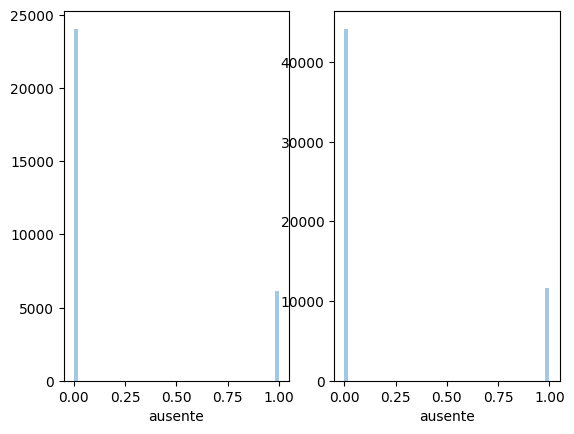

In [47]:
#F    55830   M    30170
ausentismo_masc = datos[datos.sexo == "M"]["ausente"]
ausentismo_fem = datos[datos.sexo == "F"]["ausente"]
plt.subplot(1, 2, 1)
sns.distplot(ausentismo_masc, kde=False)
plt.subplot(1, 2, 2)
sns.distplot(ausentismo_fem, kde=False)
plt.show()

In [48]:
ausentismo_sms = datos.sms_recibidos.value_counts()
ausentismo_sms

0    61120
1    24880
Name: sms_recibidos, dtype: int64

<ipython-input-49-b12569c95bab>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(datos.cod_barrio, kde=False)
<ipython-input-49-b12569c95bab>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(datos[datos.ausente == 1]["cod_barrio"], kde=False)


<Axes: xlabel='cod_barrio'>

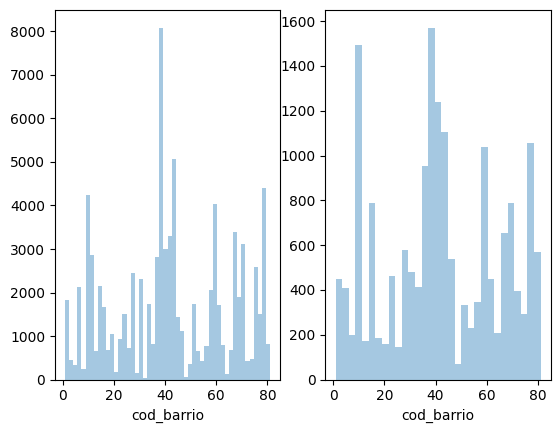

In [49]:
plt.subplot(1, 2, 1)
sns.distplot(datos.cod_barrio, kde=False)
plt.subplot(1, 2, 2)
sns.distplot(datos[datos.ausente == 1]["cod_barrio"], kde=False)

<ipython-input-50-02251cb47aa5>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(presente_age,color="green")
<ipython-input-50-02251cb47aa5>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ausente_age,color="red")


<Axes: xlabel='edad', ylabel='Density'>

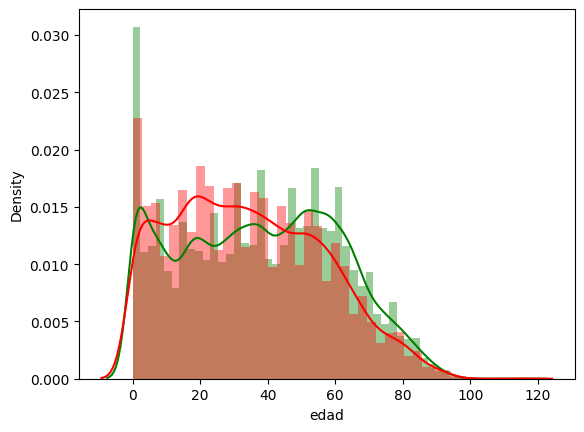

In [50]:
presente_age = datos[datos.ausente == 0]["edad"]
ausente_age = datos[datos.ausente == 1]["edad"]
sns.distplot(presente_age,color="green")
sns.distplot(ausente_age,color="red")

In [51]:
datos.discapacidades.value_counts()

0    84250
1     1593
2      147
3       10
Name: discapacidades, dtype: int64

# 3. Procesamientos de Datos

In [52]:
#Voy a crear una tabla que sumara las faltas que ha tenido un mismo paciente
#Para esto pongo los valores 0 en -1, agrupo por id_paciente y hago la suma
#Mientras mayor sea este valor, más ha faltado
#Al pincipio lo hice sacando la media de faltas pero de esa forma un paciente que ha tenido un solo turno y y faltó tiene 
#el mismo valor que no que ha tenido 7 turno y faltó a los 7
diferencia_ausentismo_pacientes = pd.DataFrame()
diferencia_ausentismo_pacientes["ausente"] = datos["ausente"].apply(lambda x: 1 if x == 1 else -1)
diferencia_ausentismo_pacientes["id_paciente"] = datos["id_paciente"]
diferencia_ausentismo_pacientes = diferencia_ausentismo_pacientes.groupby(diferencia_ausentismo_pacientes["id_paciente"]).sum()
diferencia_ausentismo_pacientes

,ausente
id_paciente,
3,-1
4,-1
5,-1
6,1
7,-1
...,...
62295,-4
62296,-1
62297,-1


In [53]:
#Las fechas estan en string, las convierto a datetime
datos["dia_reserva_turno"] = pd.to_datetime(datos["dia_reserva_turno"])
datos["dia_turno"] = pd.to_datetime(datos["dia_turno"])

In [54]:
# Usando OneHotEncoder de sklearn
# Para pasar variables categóricas nominales a números
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
oh_array = ohe.fit_transform(datos['sexo'].values.reshape(-1, 1)).toarray()
oh_df = pd.DataFrame(oh_array,columns=['femenino','masculino'])
datos_oh=pd.concat([datos,oh_df],axis=1)
datos_oh.head(5)

,id,id_paciente,id_turno,sexo,dia_reserva_turno,dia_turno,cod_barrio,edad,plan_social,hipertension,diabetes,alcoholismo,discapacidades,sms_recibidos,ausente,femenino,masculino
0,1,30846,29333,F,2019-08-12 18:38:08+00:00,2019-08-12 00:00:00+00:00,40,62,0,1,0,0,0,0,0,1.0,0.0
1,2,55326,29080,M,2019-08-12 16:08:27+00:00,2019-08-12 00:00:00+00:00,40,56,0,0,0,0,0,0,0,0.0,1.0
2,3,15723,29116,F,2019-08-12 16:19:04+00:00,2019-08-12 00:00:00+00:00,46,62,0,0,0,0,0,0,0,1.0,0.0
3,4,9019,29300,F,2019-08-12 17:29:31+00:00,2019-08-12 00:00:00+00:00,55,8,0,0,0,0,0,0,0,1.0,0.0
4,5,23942,29074,F,2019-08-12 16:07:23+00:00,2019-08-12 00:00:00+00:00,40,56,0,1,1,0,0,0,0,1.0,0.0


In [55]:
def sumar_enfermedades(row):
  return row['hipertension'] + row['diabetes'] + row["alcoholismo"] + row["discapacidades"]
  

datos_oh["diferencia_dia_turno"] = (datos_oh['dia_turno'] - datos_oh['dia_reserva_turno']).apply(lambda x: x.days)#dias de diferencia entre pedir el turno e ir

datos_oh["enfermedad"] = datos_oh.apply(sumar_enfermedades,axis=1 )#dias de diferencia entre pedir el turno e ir

#def comparar_fechas(row):
#    if row['dia_turno'].date() == row['dia_reserva_turno'].date():
#        return 1
#    else:
#        return 0
#
#datos_oh["mismo_dia_turno"] = datos_oh.apply(comparar_fechas,axis=1 )#dias de diferencia entre pedir el turno e ir

In [56]:
datos_reindex = datos_oh.reindex(columns=["id_paciente","diferencia_dia_turno","cod_barrio","edad","plan_social","enfermedad","sms_recibidos","ausente"])
datos_reindex.head(10)


,id_paciente,diferencia_dia_turno,cod_barrio,edad,plan_social,enfermedad,sms_recibidos,ausente
0,30846,-1,40,62,0,1,0,0
1,55326,-1,40,56,0,0,0,0
2,15723,-1,46,62,0,0,0,0
3,9019,-1,55,8,0,0,0,0
4,23942,-1,40,56,0,2,0,0
5,47044,1,59,76,0,1,0,0
6,57940,1,26,23,0,0,0,1
7,14327,1,26,39,0,0,0,1
8,37461,-1,2,21,0,0,0,0
9,42681,1,13,19,0,0,0,0


In [57]:
#divido para tene datos de validación
datos_reindex_train , datos_reindex_validation = train_test_split(datos_reindex,test_size=0.2,random_state=25,stratify=datos_reindex["ausente"])
datos_reindex_validation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17200 entries, 71422 to 18622
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   id_paciente           17200 non-null  int64
 1   diferencia_dia_turno  17200 non-null  int64
 2   cod_barrio            17200 non-null  int64
 3   edad                  17200 non-null  int64
 4   plan_social           17200 non-null  int64
 5   enfermedad            17200 non-null  int64
 6   sms_recibidos         17200 non-null  int64
 7   ausente               17200 non-null  int64
dtypes: int64(8)
memory usage: 1.2 MB


<Axes: xlabel='ausente', ylabel='count'>

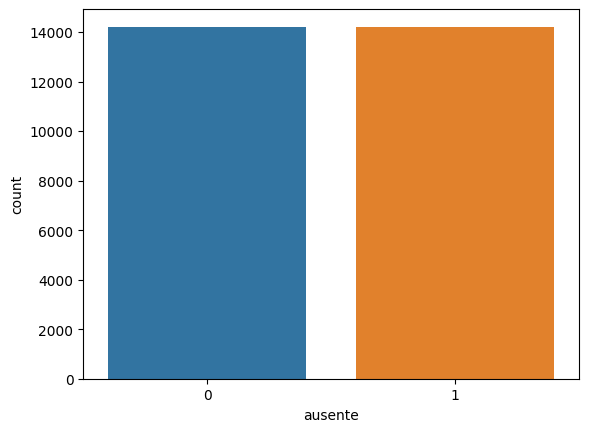

In [58]:
#aplico undersampling
clase_minoritaria_len = len(datos_reindex_train[datos_reindex_train["ausente"]==1])
clase_mayoritaria_indices = datos_reindex_train[datos_reindex_train["ausente"] == 0].index
clase_mayoritaria_random_indices = np.random.choice(clase_mayoritaria_indices, clase_minoritaria_len,replace=False)
clase_minoritaria_indices = datos_reindex_train[datos_reindex_train["ausente"]==1].index
under_sample_indices = np.concatenate([clase_minoritaria_indices,clase_mayoritaria_random_indices])
under_sample = datos_reindex_train.loc[under_sample_indices]
sns.countplot(x="ausente",data=under_sample)

In [59]:
X = under_sample[["id_paciente","diferencia_dia_turno","cod_barrio","edad","plan_social","enfermedad","sms_recibidos"]]

y = under_sample["ausente"]

x_validation = datos_reindex_validation[["id_paciente","diferencia_dia_turno","cod_barrio","edad","plan_social","enfermedad","sms_recibidos"]]

y_validation = datos_reindex_validation["ausente"]

# 4. Dividir el conjunto de datos

In [60]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=25,stratify=y) 

In [61]:
#Armo la labla similar a la de diferencia ausentismo perro ahora solo con los datos de entrenamiento 
diferencia_ausentismo_pacientes_train = pd.DataFrame()
diferencia_ausentismo_pacientes_train["ausente"] = y_train.apply(lambda x: 1 if x == 1 else -1)
diferencia_ausentismo_pacientes_train["id_paciente"] = x_train["id_paciente"]
diferencia_ausentismo_pacientes_train = diferencia_ausentismo_pacientes_train.groupby(diferencia_ausentismo_pacientes_train["id_paciente"]).sum()
diferencia_ausentismo_pacientes_train = diferencia_ausentismo_pacientes_train.squeeze()
diferencia_ausentismo_pacientes_train_df = x_train["id_paciente"].apply(   #agrego las diferencias de ausentismo a cada paciente 
    lambda x: diferencia_ausentismo_pacientes_train[x] if x in diferencia_ausentismo_pacientes_train  else 0).to_frame("diferencia_ausentismo_paciente")
x_train["diferencia_ausentismo_paciente"] = diferencia_ausentismo_pacientes_train_df

x_train.head(100)

,id_paciente,diferencia_dia_turno,cod_barrio,edad,plan_social,enfermedad,sms_recibidos,diferencia_ausentismo_paciente
12351,29201,-1,48,68,0,2,0,-1
5253,19579,16,40,38,0,0,0,-1
56118,8948,5,70,61,0,2,1,1
22383,19391,4,60,59,0,2,0,1
35442,23469,27,41,54,0,4,0,1
...,...,...,...,...,...,...,...,...
14281,33353,1,70,5,1,0,0,-2
7143,43531,6,44,36,0,0,1,2
58138,3920,-1,9,54,0,1,0,-1
11012,4581,14,43,34,0,0,1,3


In [62]:
diferencia_ausentismo_pacientes_test_df = x_test["id_paciente"].apply(   #agrego las diferencias de ausentismo a cada paciente del testeo
    lambda x: diferencia_ausentismo_pacientes_train[x] if x in diferencia_ausentismo_pacientes_train  else 0).to_frame("diferencia_ausentismo_paciente")
x_test["diferencia_ausentismo_paciente"] = diferencia_ausentismo_pacientes_test_df
x_test

,id_paciente,diferencia_dia_turno,cod_barrio,edad,plan_social,enfermedad,sms_recibidos,diferencia_ausentismo_paciente
29833,15225,4,70,23,0,0,1,0
47057,23489,-1,53,25,0,0,0,0
20459,62214,-1,2,0,0,0,0,-1
32489,42902,11,44,30,1,0,1,0
21303,43033,8,58,52,0,0,0,1
...,...,...,...,...,...,...,...,...
19297,19605,-1,22,7,1,0,0,0
79165,33661,-1,79,63,0,0,0,0
60638,29417,29,63,55,0,0,1,0
28353,32442,-1,77,17,0,0,0,0


In [63]:
diferencia_ausentismo_pacientes_test_df = x_validation["id_paciente"].apply(   #agrego las diferencias de ausentismo a cada paciente de la validación
    lambda x: diferencia_ausentismo_pacientes_train[x] if x in diferencia_ausentismo_pacientes_train  else 0).to_frame("diferencia_ausentismo_paciente")
x_validation["diferencia_ausentismo_paciente"] = diferencia_ausentismo_pacientes_test_df

In [64]:
x_train = x_train.drop(columns=["id_paciente"]) #estas columnas fueron reemplazadas por diferencia_ausentismo_paciente
x_test = x_test.drop(columns=["id_paciente"])
x_validation = x_validation.drop(columns=["id_paciente"])

# 5. Crear el modelo

In [65]:
modelo_rf = RandomForestClassifier()
modelo_rf.fit(x_train,y_train)
predict = modelo_rf.predict(x_test)
print(classification_report(y_test,predict))
print(modelo_rf.get_params())

              precision    recall  f1-score   support

           0       0.66      0.55      0.60      4265
           1       0.62      0.72      0.66      4265

    accuracy                           0.63      8530
   macro avg       0.64      0.63      0.63      8530
weighted avg       0.64      0.63      0.63      8530

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


<Axes: >

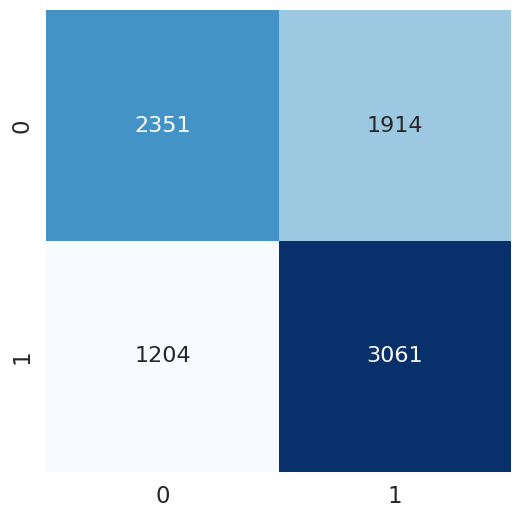

In [66]:
con_mat = confusion_matrix(y_test, predict)
con_mat = pd.DataFrame(con_mat, range(2), range(2))

#Matriz de confusion 
plt.figure(figsize=(6,6))
sns.set(font_scale=1.5) 
sns.heatmap(con_mat, annot=True, annot_kws={"size": 16}, fmt='g', cmap='Blues', cbar=False)

# 6. Entrenamiento, calibración y validación

In [67]:
from sklearn.model_selection import RandomizedSearchCV# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 500, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 50, cv = 3, verbose=2, random_state=42, n_jobs = -1)# Fit the random search model
rf_random.fit(x_train, y_train)
rf_random.best_params_

Fitting 3 folds for each of 50 candidates, totalling 150 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


{'n_estimators': 50,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 10,
 'bootstrap': True}

In [68]:
parameters = {
      'n_estimators': [400,450],
      'min_samples_split': [2,3,4],
      'min_samples_leaf': [3,4,5],
      'max_features': ['sqrt'],
      'max_depth': [8,9,10],
      'bootstrap': [True]
}
rf = RandomForestClassifier()
modelo_rf_cv=GridSearchCV(rf,parameters,cv=3,scoring="recall",verbose=2)
modelo_rf_cv.fit(x_train,y_train.values.ravel())

Fitting 3 folds for each of 54 candidates, totalling 162 fits
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=400; total time=   3.4s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=400; total time=   3.9s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=400; total time=   3.2s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=450; total time=   3.6s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=450; total time=   4.6s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=450; total time=   3.5s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=400; total time= 

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'max_depth': [8, 9, 10],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [400, 450]},
             scoring='recall', verbose=2)

In [69]:
modelo_rf_cv.best_params_

{'bootstrap': True,
 'max_depth': 8,
 'max_features': 'sqrt',
 'min_samples_leaf': 5,
 'min_samples_split': 3,
 'n_estimators': 450}

## Validacion

In [70]:
predict_validation = modelo_rf.predict(x_validation)
print(classification_report(y_validation,predict_validation))
print(modelo_rf.get_params())

              precision    recall  f1-score   support

           0       0.88      0.55      0.68     13646
           1       0.29      0.72      0.42      3554

    accuracy                           0.58     17200
   macro avg       0.59      0.63      0.55     17200
weighted avg       0.76      0.58      0.62     17200

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


# 8. Realizar Predicciones
**Leer nuevas instancias a predecir**

In [71]:
nuevas_instancias_pd= pd.read_csv('https://raw.githubusercontent.com/profcarlosamartinez/mineria_datos/main/ausentismo_2023/nuevas_instancias_a_predecir.csv',delimiter=',',decimal='.')

In [72]:
nuevas_instancias_pd["dia_reserva_turno"] = pd.to_datetime(nuevas_instancias_pd["dia_reserva_turno"])
nuevas_instancias_pd["dia_turno"] = pd.to_datetime(nuevas_instancias_pd["dia_turno"])

In [73]:
nuevas_instancias_pd.shape

(24527, 14)

In [74]:
def sumar_enfermedades(row):
  return row['hipertension'] + row['diabetes'] + row["alcoholismo"] + row["discapacidades"]
  

nuevas_instancias_pd["diferencia_dia_turno"] = (nuevas_instancias_pd['dia_turno'] - nuevas_instancias_pd['dia_reserva_turno']).apply(lambda x: x.days)#dias de diferencia entre pedir el turno e ir

nuevas_instancias_pd["enfermedad"] = nuevas_instancias_pd.apply(sumar_enfermedades,axis=1 )#dias de diferencia entre pedir el turno e ir

In [75]:
diferencia_ausentismo_pacientes_nuevas = nuevas_instancias_pd["id_paciente"].apply(   #agrego las diferencias de ausentismo a cada paciente 
    lambda x: diferencia_ausentismo_pacientes[x] if x in diferencia_ausentismo_pacientes  else 0).to_frame("diferencia_ausentismo_paciente")
nuevas_instancias_pd["diferencia_ausentismo_paciente"] = diferencia_ausentismo_pacientes_nuevas


In [76]:
nuevas_instancias = nuevas_instancias_pd.reindex(columns=["diferencia_dia_turno","cod_barrio","edad","plan_social","enfermedad","sms_recibidos","diferencia_ausentismo_paciente"])
nuevas_instancias.tail(2)

,diferencia_dia_turno,cod_barrio,edad,plan_social,enfermedad,sms_recibidos,diferencia_ausentismo_paciente
24525,40,44,38,0,0,1,0
24526,40,44,54,0,0,1,0


In [ ]:
prediccion_nuevos_individuos=modelo_rf_cv.predict(nuevas_instancias)

In [ ]:
datos_clasificados=pd.DataFrame(prediccion_nuevos_individuos)

In [ ]:
datos_clasificados.index = datos_clasificados.index + 1

In [ ]:
datos_clasificados.tail(3)

,0
24525,1
24526,1
24527,1


In [ ]:
datos_clasificados.columns = ['Predicted']
datos_clasificados.index.names = ['id']

In [ ]:
datos_clasificados.columns

Index(['Predicted'], dtype='object')

In [ ]:
datos_clasificados.head(2)

,Predicted
id,
1,1
2,1


In [ ]:
from google.colab import files

In [ ]:
datos_clasificados.to_csv('predicted.csv',sep=',')
files.download('predicted.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>